In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.shape

(537577, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()   #Product_Category_2, Product_Category_3 are having null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
# from above Product_Category_2, Product_Category_3 are having null values 

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
# from above Product_Category_2, Product_Category_3 are having null values 
# If we remove rows with null value, it will remove 60%-70% of our data
# Hence, removing the columns with null values, as majority of data points are missing

del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
print("Shape of Data:", df.shape, "\n")
df.head()

Shape of Data: (537577, 10) 



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Analysing Columns

In [9]:
print("Number of unique users:" , df['User_ID'].nunique() , "\n")

df['User_ID'].unique()

Number of unique users: 5891 



array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
print("Number of unique Products:" , df['Product_ID'].nunique() , "\n")

df['Product_ID'].unique()

Number of unique Products: 3623 



array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [11]:
print("unique Genders:" , df['Gender'].nunique() , "\n")

df['Gender'].unique()

unique Genders: 2 



array(['F', 'M'], dtype=object)

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
print("Number of unique Occupation:" , df['Occupation'].nunique() , "\n")

df['Occupation'].unique()

Number of unique Occupation: 21 



array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
print("Number of unique City Category:" , df['City_Category'].nunique() , "\n")

df['City_Category'].unique()

Number of unique City Category: 3 



array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [17]:
print("Number of unique values in Product_Category_1 :" , df['Product_Category_1'].nunique() , "\n")

df['Product_Category_1'].unique()

Number of unique values in Product_Category_1 : 18 



array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [18]:
df['Purchase'].sum()

5017668378

In [19]:
print("Mean/Avg. Purchase:", df['Purchase'].sum()/ len(df["Purchase"]))

Mean/Avg. Purchase: 9333.859852635065


In [20]:
for column in df.columns:
    print(column, ":" , df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [21]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

<Axes: ylabel='Ratio'>

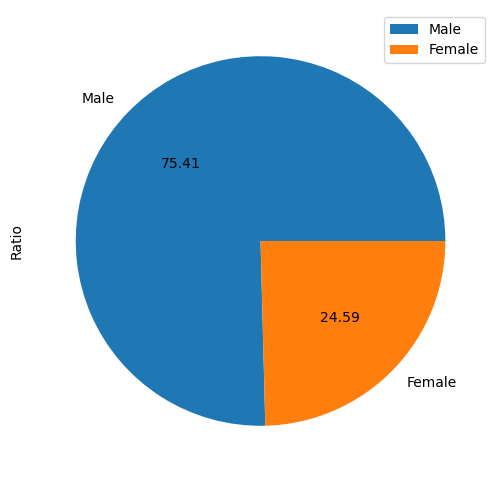

In [22]:
data.plot(kind = 'pie', y = 'Ratio', figsize = (6,6), autopct = "%0.2f")

<Axes: title={'center': 'Gender Ratio'}>

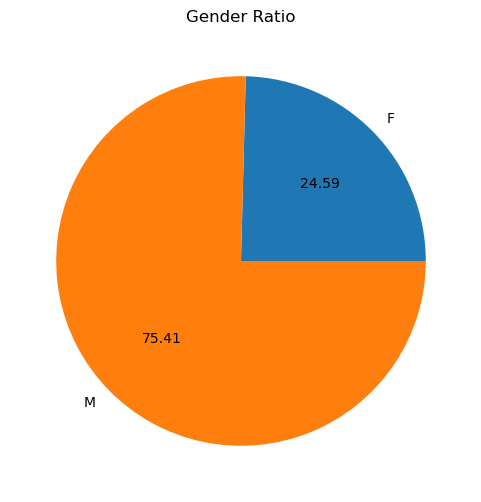

In [23]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 y = 'Ratio', 
                                 figsize = (6,6), 
                                 autopct = "%0.2f",
                                 title = "Gender Ratio")

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

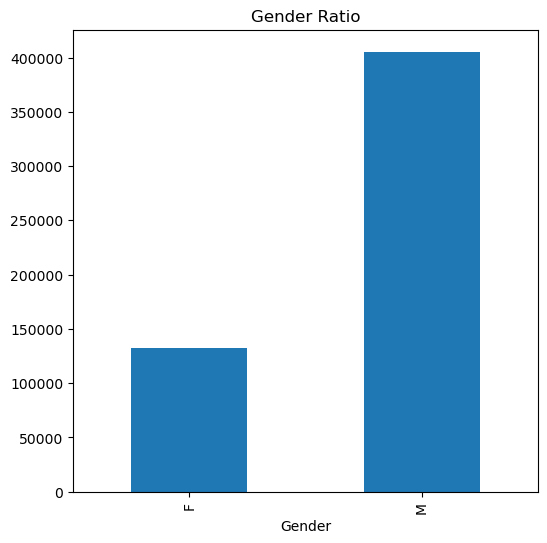

In [24]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 y = 'Ratio', 
                                 figsize = (6,6), 
                                 title = "Gender Ratio")

In [28]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

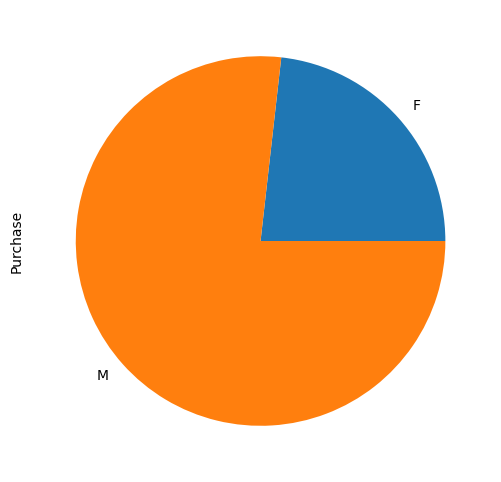

In [30]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',
                               figsize = (6,6))